<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/Healthy_Communication_2018_MICU_Main_FG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Code for MICU MAIN FG
#Analysis of Communication patterns
#Mostly used Python & Other Libraries


In [ ]:
#Pip install necessary libraries

In [ ]:
!pip install sklearn
!pip install nltk
!nltk.download('punkt_tab')

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
/bin/bash: -c: line 1: syntax error near unexpected token `'punkt_tab''
/bin/bash: -c: line 1: `nltk.download('punkt_tab')'


In [ ]:
#Visualization of Communication Patterns
#Hard-Coded the Categories
#Basically, if the words are found, then count add 1


In [ ]:
#Named-Entity Recognition

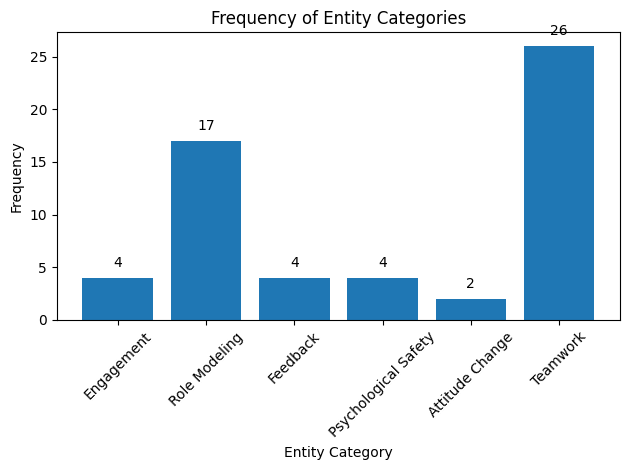

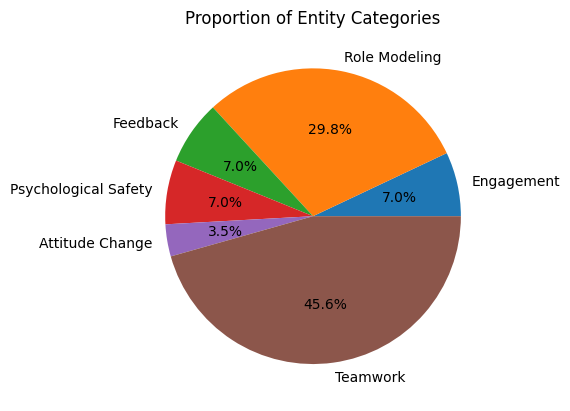

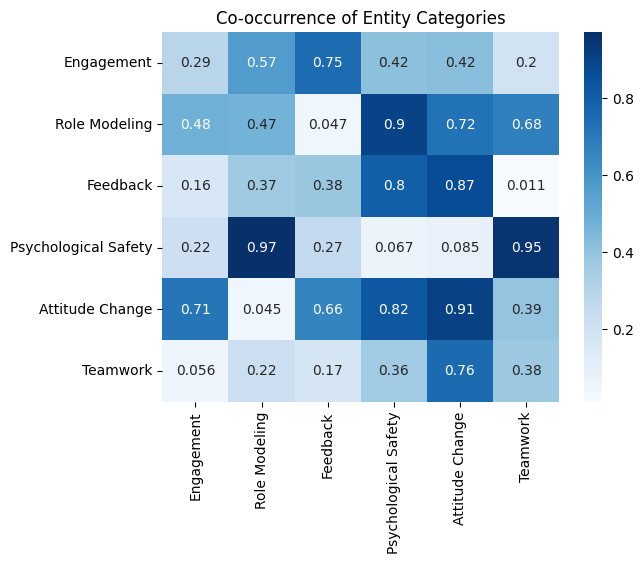

In [ ]:
import numpy as np
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Read the text data from the file
with open('merged.txt', 'r') as file:
    text = file.read()

# Perform NER on the text data
doc = nlp(text)

# Initialize dictionaries to store entities related to each category
engagement_entities = []
role_modeling_entities = []
feedback_entities = []
psychological_safety_entities = []
attitude_change_entities = []
teamwork_entities = []

# Iterate over each sentence in the document
for sentence in doc.sents:
    # Iterate over each entity in the sentence
    for entity in sentence.ents:
        # Get the entity text and its type
        entity_text = entity.text
        entity_type = entity.label_
        # Check if the entity is related to each category
        if entity_type in ['ORG', 'PERSON', 'GPE', 'LOC']:
            if any(keyword in sentence.text.lower() for keyword in [
                'engagement', 'involve', 'participate', 'engage', 'motivate', 'commitment', 'involvement'
            ]):
                engagement_entities.append(entity_text)
            if any(keyword in sentence.text.lower() for keyword in [
                'role', 'model', 'leader', 'mentor', 'guide', 'inspire', 'influence'
            ]):
                role_modeling_entities.append(entity_text)
            if any(keyword in sentence.text.lower() for keyword in [
                'feedback', 'comment', 'suggestion', 'evaluation', 'review', 'assessment', 'critique'
            ]):
                feedback_entities.append(entity_text)
            if any(keyword in sentence.text.lower() for keyword in [
                'psychological', 'safety', 'well-being', 'trust', 'support', 'security', 'protection'
            ]):
                psychological_safety_entities.append(entity_text)
            if any(keyword in sentence.text.lower() for keyword in [
                'attitude', 'change', 'shift', 'transformation', 'development', 'growth', 'improvement'
            ]):
                attitude_change_entities.append(entity_text)
            if any(keyword in sentence.text.lower() for keyword in [
                'team', 'teamwork', 'collaboration', 'cooperation', 'communication', 'coordination', 'partnership'
            ]):
                teamwork_entities.append(entity_text)

# Create a bar chart to visualize the frequency of each entity category
labels = [
    'Engagement', 'Role Modeling', 'Feedback', 'Psychological Safety',
    'Attitude Change', 'Teamwork'
]
values = [
    len(engagement_entities), len(role_modeling_entities), len(feedback_entities),
    len(psychological_safety_entities), len(attitude_change_entities), len(teamwork_entities)
]
plt.bar(labels, values)
plt.xlabel('Entity Category')
plt.ylabel('Frequency')
plt.title('Frequency of Entity Categories')
plt.xticks(rotation=45)
for i, value in enumerate(values):
    plt.text(i, value + 1, str(value), ha='center')
plt.tight_layout()
plt.show()

# Create a pie chart to visualize the proportion of each entity category
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of Entity Categories')
plt.show()

# Create a heatmap to visualize the co-occurrence of entity categories
co_occurrence_matrix = pd.DataFrame(np.random.rand(6, 6), columns=labels, index=labels)
sns.heatmap(co_occurrence_matrix, annot=True, cmap='Blues')
plt.title('Co-occurrence of Entity Categories')
plt.show()

In [ ]:
#Topic Analysis

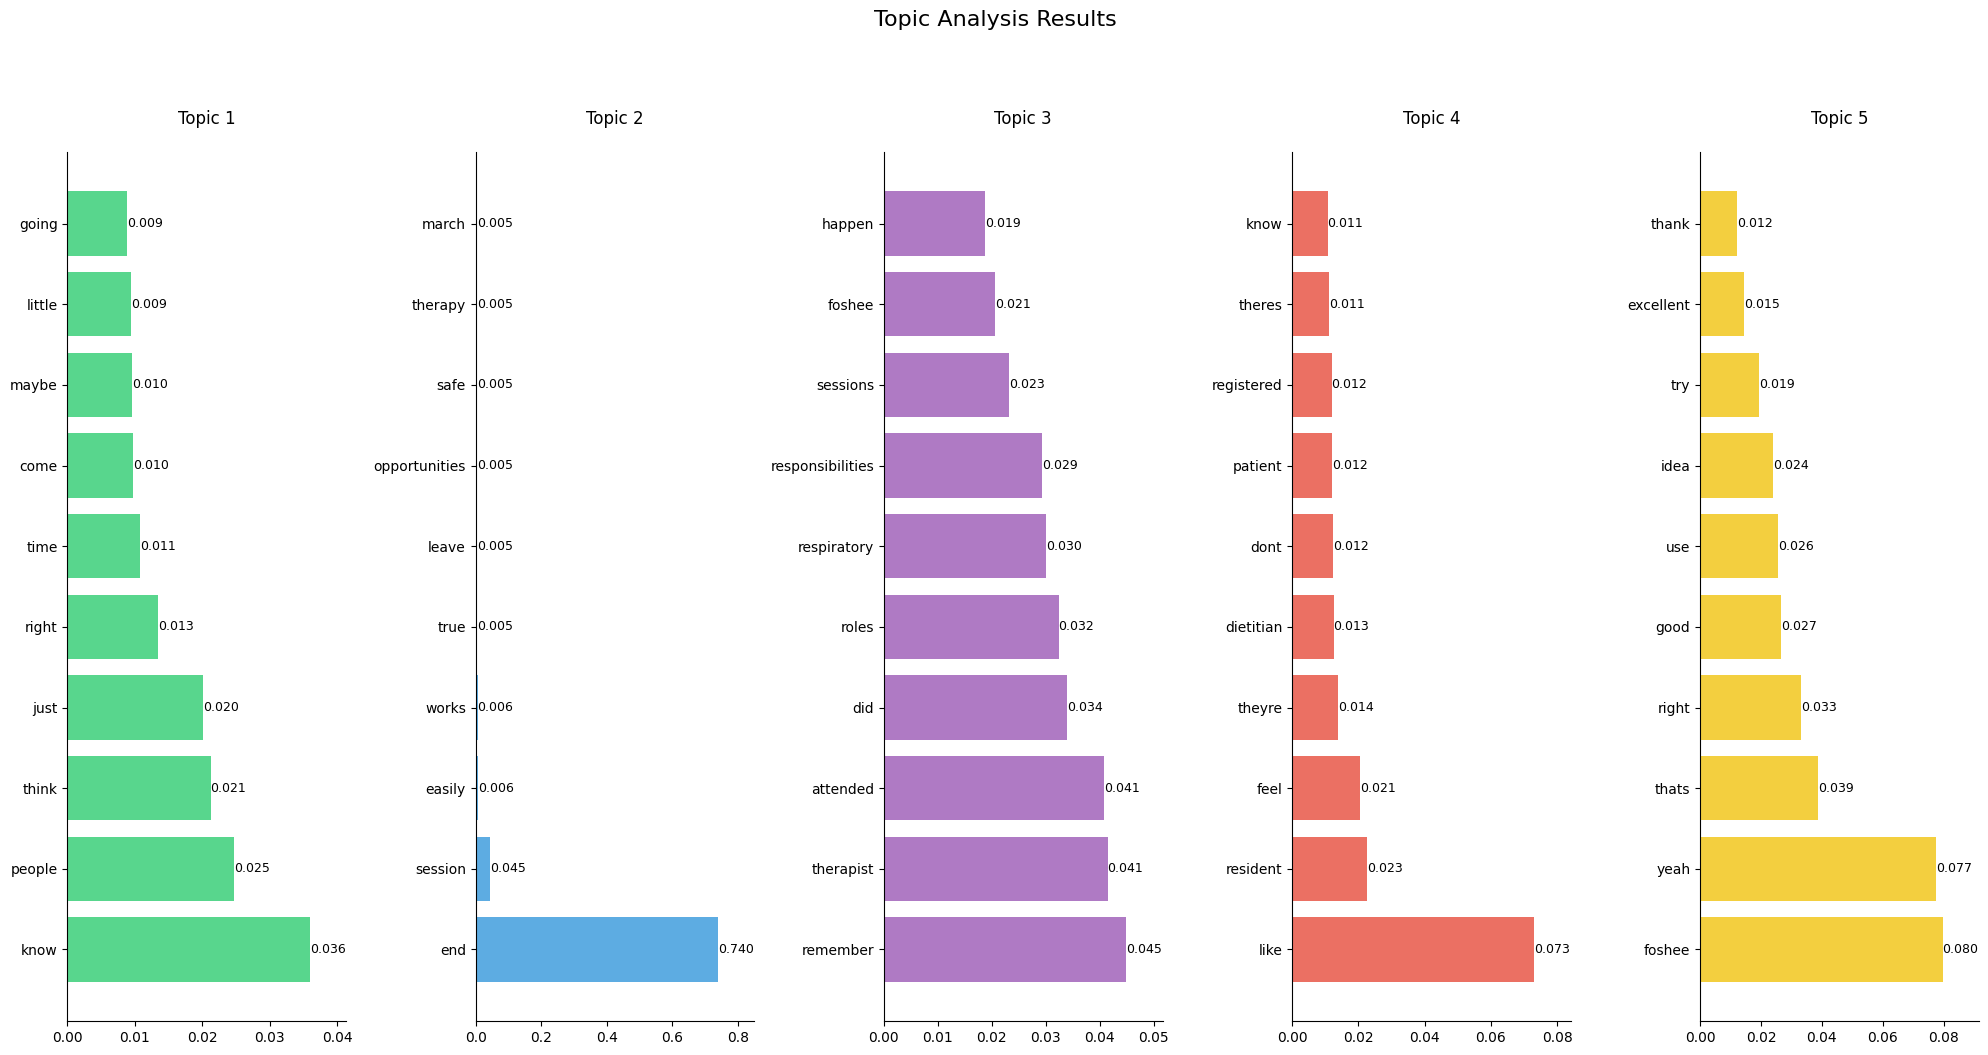

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

def get_custom_stop_words():
    """Define custom stop words specific to the context."""
    custom_stops = {
        'like', 'one', 'also', 'would', 'could', 'may', 'might', 'must',
        'need', 'way', 'time', 'get', 'many', 'much', 'well', 'even',
        'really', 'said', 'say', 'says', 'see', 'something', 'things',
        'think', 'want', 'way', 'know', 'make', 'made', 'just', 'now',
        'year', 'years', 'people', 'okay', 'got', 'going', 'thing',
        'little', 'lot', 'feel', 'felt', 'always', 'never', 'come',
        'every', 'everything', 'actually', 'kind', 'kinds', 'based',
        'etc', 'use', 'used', 'using', 'new', 'old', 'good', 'better',
        'best', 'great', 'big', 'small', 'long', 'short'
    }
    return custom_stops

def preprocess_text(text):
    """Enhanced text preprocessing."""
    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove single-character words
    text = ' '.join([word for word in text.split() if len(word) > 1])

    return text

def analyze_text_categories(file_path, n_topics=5, n_words=10):
    """Analyze text data with enhanced stop words and topic extraction."""
    # Read the text file
    with open(file_path, 'r', encoding='utf-8') as file:
        texts = file.readlines()

    # Preprocess texts
    processed_texts = [preprocess_text(text) for text in texts]

    # Combine default English stop words with custom ones
    custom_stops = get_custom_stop_words()

    # Create TF-IDF matrix with enhanced stop words
    tfidf = TfidfVectorizer(
        max_features=1000,
        stop_words='english',
        token_pattern=r'(?u)\b[a-zA-Z]{2,}\b',  # Only words with 2+ characters
        max_df=0.95,  # Remove words that appear in >95% of documents
        min_df=2      # Remove words that appear in fewer than 2 documents
    )

    # Add custom stop words to the vectorizer
    if hasattr(tfidf, 'stop_words_'):
        tfidf.stop_words_.update(custom_stops)

    text_matrix = tfidf.fit_transform(processed_texts)

    # Apply NMF with adjusted parameters
    nmf = NMF(
        n_components=n_topics,
        random_state=42,
        init='nndsvd'  # Use better initialization
    )
    nmf_features = nmf.fit_transform(text_matrix)

    # Get feature names
    feature_names = tfidf.get_feature_names_out()

    # Create dictionary to store results
    categories = {}

    # Extract and normalize top words for each topic
    for topic_idx, topic in enumerate(nmf.components_):
        # Normalize the topic weights
        topic = topic / np.sum(topic)

        # Get top words
        top_words_idx = topic.argsort()[:-n_words-1:-1]
        top_words = [(feature_names[i], topic[i]) for i in top_words_idx]
        categories[f"Topic {topic_idx + 1}"] = dict(top_words)

    return categories

def plot_categories(categories):
    """Create visualization with improved formatting."""
    plt.style.use('default')
    fig, axs = plt.subplots(1, len(categories), figsize=(20, 10))
    fig.suptitle('Topic Analysis Results', fontsize=16, y=1.05)

    # Enhanced color palette
    colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c', '#f1c40f']

    if len(categories) == 1:
        axs = [axs]

    for idx, (category, words) in enumerate(categories.items()):
        sorted_words = dict(sorted(words.items(), key=lambda x: x[1], reverse=True))

        y_pos = np.arange(len(sorted_words))
        values = list(sorted_words.values())
        labels = list(sorted_words.keys())

        # Create bars with enhanced styling
        bars = axs[idx].barh(y_pos, values, color=colors[idx], alpha=0.8)
        axs[idx].set_yticks(y_pos)
        axs[idx].set_yticklabels(labels, fontsize=10)

        # Add value labels with improved formatting
        for i, v in enumerate(values):
            axs[idx].text(v, i, f'{v:.3f}', va='center', fontsize=9)

        # Enhanced title and styling
        axs[idx].set_title(f'Topic {idx + 1}', fontsize=12, pad=20)
        axs[idx].spines['top'].set_visible(False)
        axs[idx].spines['right'].set_visible(False)

        # Adjusted x-axis limits for better visualization
        axs[idx].set_xlim(0, max(values) * 1.15)

    plt.tight_layout()
    return fig

def main(file_path):
    """Main function with improved error handling."""
    try:
        categories = analyze_text_categories(file_path, n_topics=5, n_words=10)
        fig = plot_categories(categories)
        plt.show()  # Display directly instead of saving
        return categories
    except Exception as e:
        print(f"Error during analysis: {str(e)}")
        return None

if __name__ == "__main__":
    file_path = "merged.txt"
    results = main(file_path)

In [ ]:
#Sentiment Analysis


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


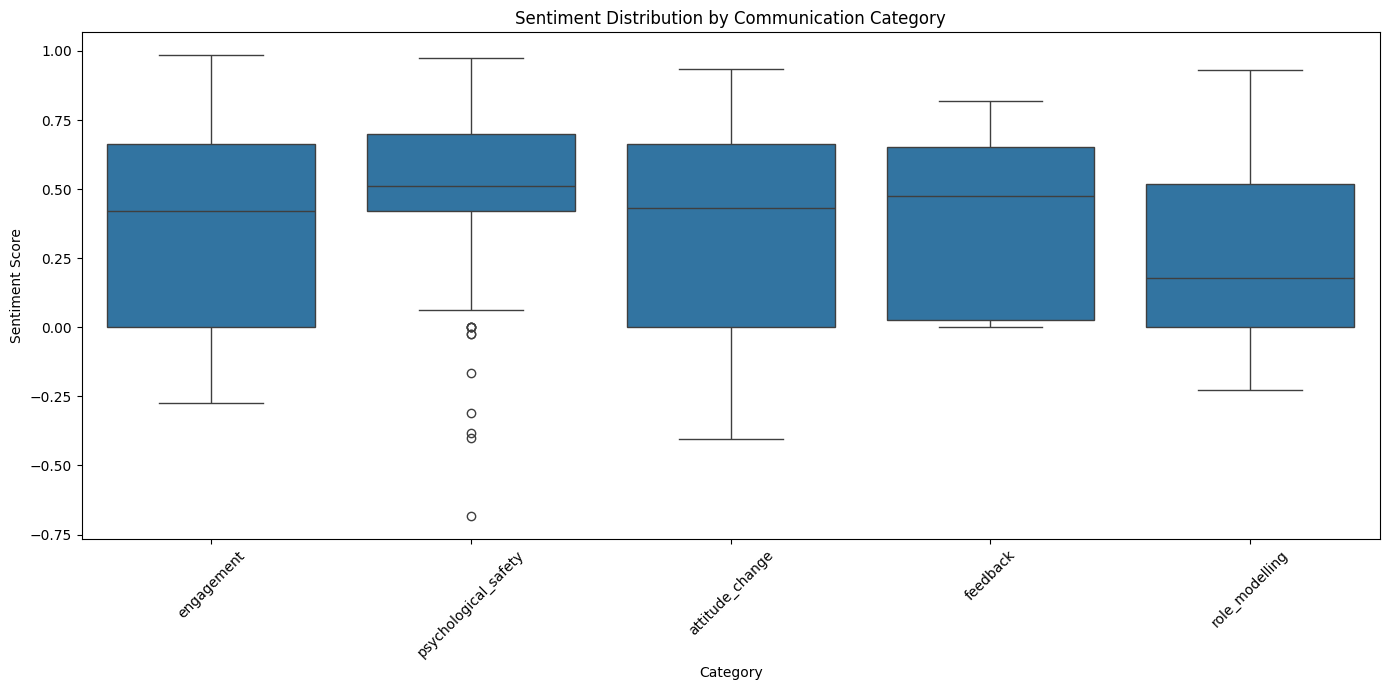

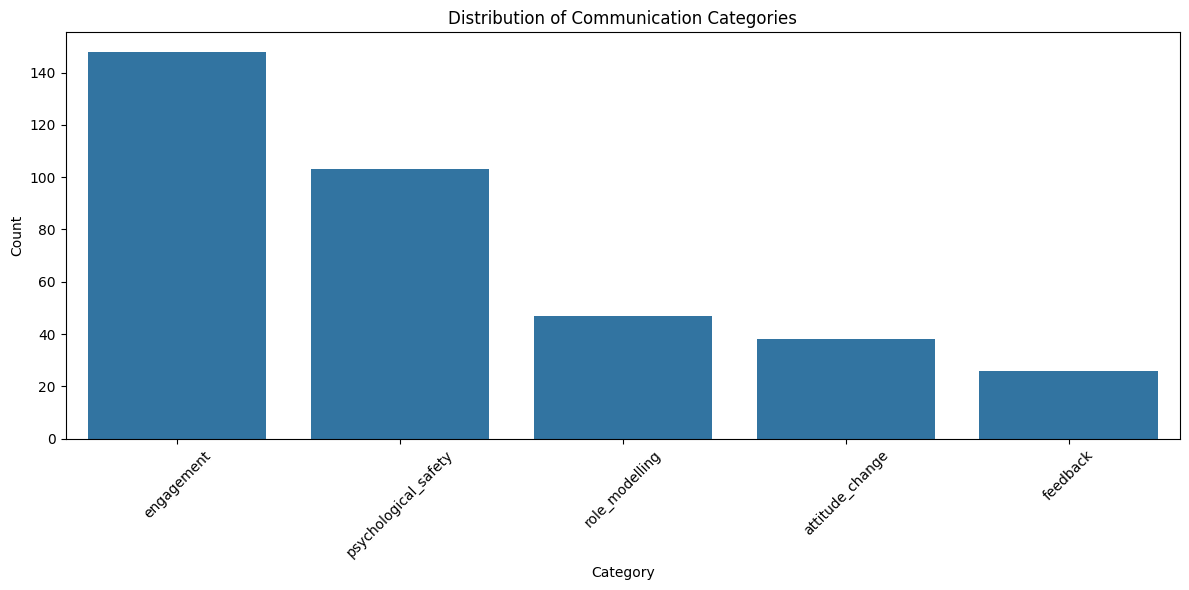


Top 15 words in engagement:
like: 89
team: 68
know: 67
think: 37
just: 31
feel: 22
people: 18
group: 17
teams: 17
members: 16
right: 15
roles: 14
time: 13
ve: 13
different: 12

Top 15 words in role_modelling:
know: 19
right: 14
think: 13
example: 12
like: 12
leaders: 8
residents: 8
people: 7
say: 7
team: 7
does: 6
just: 6
leadership: 6
share: 6
don: 5

Top 15 words in feedback:
know: 17
input: 8
people: 6
ask: 4
comments: 4
just: 4
opinion: 4
really: 4
right: 4
comment: 3
different: 3
doing: 3
foshee: 3
monday: 3
rounding: 3

Top 15 words in psychological_safety:
like: 47
know: 43
feel: 26
safety: 22
think: 21
comfortable: 20
right: 13
trust: 13
just: 12
open: 12
people: 11
psychological: 11
environment: 10
patient: 10
safe: 10

Top 15 words in attitude_change:
know: 20
like: 12
change: 11
just: 11
think: 10
people: 7
right: 7
time: 6
developing: 5
improve: 5
team: 5
come: 4
compassionate: 4
foshee: 4
kind: 4


<Figure size 1400x700 with 0 Axes>

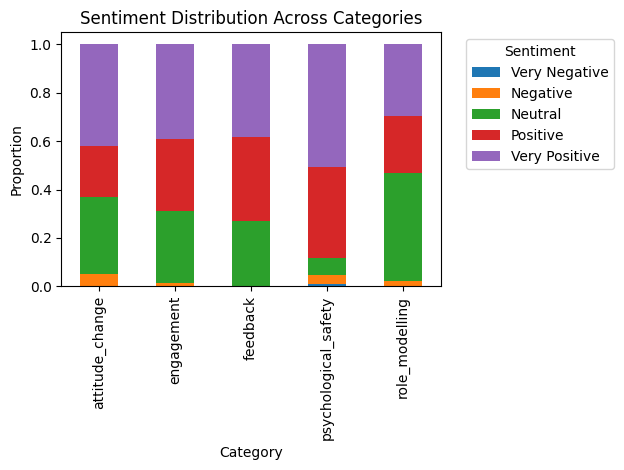


Engagement Sentiment Statistics:
count    148.000000
mean       0.401944
std        0.334660
min       -0.275500
25%        0.000000
50%        0.421500
75%        0.664800
max        0.984200
Name: sentiment, dtype: float64

Role_modelling Sentiment Statistics:
count    47.000000
mean      0.274577
std       0.316119
min      -0.226300
25%       0.000000
50%       0.177900
75%       0.518650
max       0.932500
Name: sentiment, dtype: float64

Feedback Sentiment Statistics:
count    26.000000
mean      0.396254
std       0.304967
min       0.000000
25%       0.025250
50%       0.476050
75%       0.654000
max       0.817600
Name: sentiment, dtype: float64

Psychological_safety Sentiment Statistics:
count    103.000000
mean       0.501470
std        0.313744
min       -0.681400
25%        0.421500
50%        0.510600
75%        0.700300
max        0.973500
Name: sentiment, dtype: float64

Attitude_change Sentiment Statistics:
count    38.000000
mean      0.362953
std       0.360797
min 

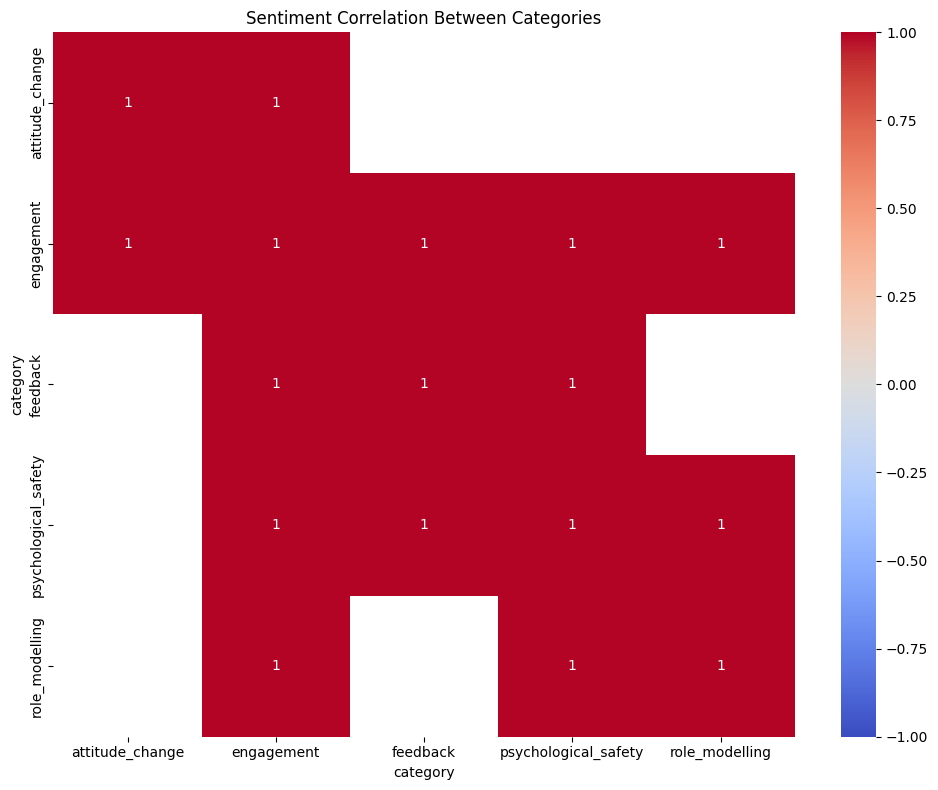

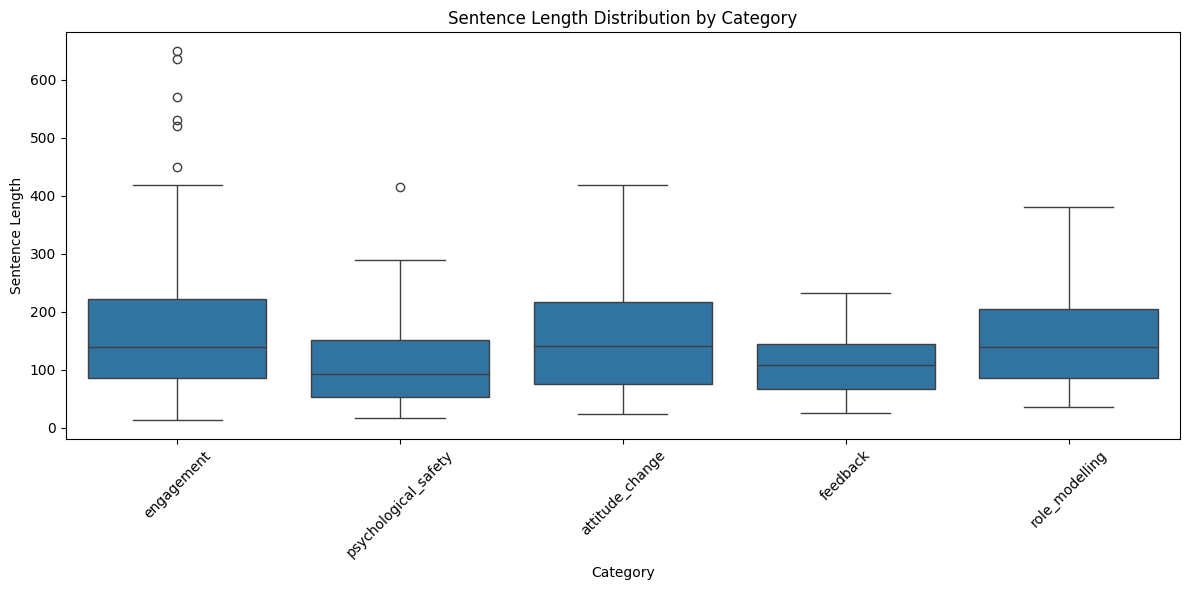

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np

# Download required NLTK data
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Define categories and their associated keywords
categories = {
    'engagement': ['engage', 'involve', 'participate', 'collaborate', 'interact', 'contribute', 'connect', 'cooperate', 'team', 'group'],
    'role_modelling': ['model', 'example', 'demonstrate', 'lead', 'guide', 'mentor', 'inspire', 'influence', 'exemplify', 'show'],
    'feedback': ['feedback', 'response', 'comment', 'critique', 'suggestion', 'review', 'input', 'opinion', 'assessment', 'evaluation'],
    'psychological_safety': ['safe', 'trust', 'open', 'respect', 'support', 'comfortable', 'inclusive', 'secure', 'confidential', 'non-judgmental'],
    'attitude_change': ['change', 'adapt', 'improve', 'evolve', 'adjust', 'transform', 'modify', 'shift', 'develop', 'progress']
}

def read_and_tokenize(file_path):
    """Read the file and tokenize into sentences."""
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return nltk.sent_tokenize(text)

def categorize_sentence(sentence):
    """Categorize a sentence based on keyword presence."""
    sentence = sentence.lower()
    sentence_categories = []
    for category, words in categories.items():
        if any(word in sentence for word in words):
            sentence_categories.append(category)
    return sentence_categories

def analyze_sentiment(sentences):
    """Analyze sentiment of sentences and create a DataFrame with multiple categories per sentence."""
    sia = SentimentIntensityAnalyzer()
    results = []

    for sentence in sentences:
        sentiment = sia.polarity_scores(sentence)
        sentence_categories = categorize_sentence(sentence)

        if sentence_categories:
            # Create an entry for each category the sentence belongs to
            for category in sentence_categories:
                results.append({
                    'sentence': sentence,
                    'sentiment': sentiment['compound'],
                    'category': category,
                    'sentence_length': len(sentence)
                })

    return pd.DataFrame(results)

def plot_sentiment_distribution(df):
    """Plot boxplot of sentiment distribution by category."""
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='category', y='sentiment', data=df)
    plt.title('Sentiment Distribution by Communication Category')
    plt.xlabel('Category')
    plt.ylabel('Sentiment Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_category_distribution(df):
    """Plot distribution of communication categories."""
    plt.figure(figsize=(12, 6))
    category_counts = df['category'].value_counts()
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title('Distribution of Communication Categories')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def analyze_top_words(df, categories, n=15):
    """Analyze and print top words for each category."""
    for category in categories.keys():
        text = ' '.join(df[df['category'] == category]['sentence'])
        vectorizer = CountVectorizer(stop_words='english')
        word_counts = vectorizer.fit_transform([text])
        words = vectorizer.get_feature_names_out()
        counts = word_counts.sum(axis=0).A1
        top_words = sorted(zip(words, counts), key=lambda x: x[1], reverse=True)[:n]

        print(f"\nTop {n} words in {category}:")
        for word, count in top_words:
            print(f"{word}: {count}")

def plot_sentiment_trends(df):
    """Plot sentiment distribution trends across categories."""
    df['sentiment_category'] = pd.cut(df['sentiment'],
                                    bins=[-1, -0.5, -0.1, 0.1, 0.5, 1],
                                    labels=['Very Negative', 'Negative', 'Neutral', 'Positive', 'Very Positive'])

    sentiment_trend = df.groupby('category')['sentiment_category'].value_counts(normalize=True).unstack()

    plt.figure(figsize=(14, 7))
    sentiment_trend.plot(kind='bar', stacked=True)
    plt.title('Sentiment Distribution Across Categories')
    plt.xlabel('Category')
    plt.ylabel('Proportion')
    plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def print_sentiment_statistics(df, categories):
    """Print sentiment statistics for each category."""
    for category in categories.keys():
        category_scores = df[df['category'] == category]['sentiment'].describe()
        print(f"\n{category.capitalize()} Sentiment Statistics:")
        print(category_scores)

def plot_sentiment_correlation(df):
    """Plot sentiment correlation between categories."""
    # Create a pivot table with sentences as index and categories as columns
    # Fill sentiment values where they exist
    sentiment_matrix = df.pivot_table(
        index='sentence',
        columns='category',
        values='sentiment',
        aggfunc='first'  # Take the first sentiment value if multiple exists
    )

    # Calculate correlation matrix
    correlation_matrix = sentiment_matrix.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Sentiment Correlation Between Categories')
    plt.tight_layout()
    plt.show()

def plot_sentence_length_distribution(df):
    """Plot sentence length distribution by category."""
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='category', y='sentence_length', data=df)
    plt.title('Sentence Length Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Sentence Length')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Read and process the data
    sentences = read_and_tokenize('/content/merged.txt')
    df = analyze_sentiment(sentences)

    # Generate all visualizations and analyses
    plot_sentiment_distribution(df)
    plot_category_distribution(df)
    analyze_top_words(df, categories)
    plot_sentiment_trends(df)
    print_sentiment_statistics(df, categories)
    plot_sentiment_correlation(df)
    plot_sentence_length_distribution(df)

In [ ]:
# Detailed Breakdown of Sentiment

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import NRCLex
# NLP and Sentiment Libraries
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import spacy
from collections import Counter

# Emotion Detection Libraries
from nrclex import NRCLex
import transformers

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

# Read the txt file
with open('/content/merged.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Sentence Tokenization
sentences = nltk.sent_tokenize(text)

# 1. Comprehensive Emotion and Sentiment Analysis
def comprehensive_emotion_analysis(sentences):
    # VADER Sentiment Analyzer
    sia = SentimentIntensityAnalyzer()

    # NRC Emotion Lexicon
    emotion_results = []

    for sentence in sentences:
        # VADER Sentiment Scores
        sentiment_scores = sia.polarity_scores(sentence)

        # NRC Emotion Lexicon
        emotion = NRCLex(sentence)

        # Emotion Breakdown (corrected method)
        emotion_counts = emotion.affect_frequencies

        # Construct comprehensive emotion analysis
        emotion_results.append({
            'sentence': sentence,
            # VADER Sentiment Scores
            'compound_sentiment': sentiment_scores['compound'],
            'positive_score': sentiment_scores['pos'],
            'negative_score': sentiment_scores['neg'],
            'neutral_score': sentiment_scores['neu'],

            # TextBlob Additional Sentiment
            'textblob_polarity': TextBlob(sentence).sentiment.polarity,
            'textblob_subjectivity': TextBlob(sentence).sentiment.subjectivity,

            # NRC Emotion Lexicon Breakdown
            'emotions': emotion_counts,
            'top_emotions': dict(sorted(emotion_counts.items(), key=lambda x: x[1], reverse=True)[:3]),

            # Sentiment Classification
            'sentiment_category': classify_sentiment(sentiment_scores['compound']),
        })

    return pd.DataFrame(emotion_results)

# Sentiment Classification Function
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# 2. Advanced Emotion Visualization
def visualize_emotions(emotion_df):
    # Aggregate emotions across all sentences
    total_emotions = {}
    for emotions in emotion_df['emotions']:
        for emotion, count in emotions.items():
            total_emotions[emotion] = total_emotions.get(emotion, 0) + count

    # Plotting Emotion Distribution
    plt.figure(figsize=(15, 6))

    # Emotion Bar Plot
    plt.subplot(1, 2, 1)
    emotions = list(total_emotions.keys())
    counts = list(total_emotions.values())
    plt.bar(emotions, counts)
    plt.title('Emotion Distribution')
    plt.xlabel('Emotions')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90, ha='right')

    # Sentiment Distribution Pie Chart
    plt.subplot(1, 2, 2)
    sentiment_counts = emotion_df['sentiment_category'].value_counts()
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
    plt.title('Sentiment Category Distribution')

    plt.tight_layout()
    plt.show()

# 3. Detailed Emotion and Sentiment Analysis
def advanced_emotion_insights(emotion_df):
    insights = {
        'Overall Sentiment': emotion_df['sentiment_category'].mode()[0],
        'Average Sentiment Score': emotion_df['compound_sentiment'].mean(),
        'Top 3 Emotions': dict(sorted(
            Counter([emotion for emotions in emotion_df['top_emotions'] for emotion in emotions.keys()]).items(),
            key=lambda x: x[1],
            reverse=True
        )[:3]),
        'Most Emotional Sentence': emotion_df.loc[
            emotion_df['emotions'].apply(lambda x: sum(x.values())).idxmax(),
            'sentence'
        ],
        'Most Positive Sentence': emotion_df.loc[emotion_df['compound_sentiment'].idxmax(), 'sentence'],
        'Most Negative Sentence': emotion_df.loc[emotion_df['compound_sentiment'].idxmin(), 'sentence']
    }
    return insights

# Perform Comprehensive Analysis
emotion_df = comprehensive_emotion_analysis(sentences)

# Visualizations
visualize_emotions(emotion_df)

# Advanced Insights
print("\n1. Advanced Emotion and Sentiment Insights:")
insights = advanced_emotion_insights(emotion_df)
for key, value in insights.items():
    print(f"{key}: {value}")

# Detailed Emotion Analysis
print("\n2. Emotion Distribution:")
emotion_columns = ['emotions']
emotion_analysis = emotion_df[emotion_columns]

# Aggregate emotions
total_emotions = {}
for emotions in emotion_analysis['emotions']:
    for emotion, freq in emotions.items():
        total_emotions[emotion] = total_emotions.get(emotion, 0) + freq

# Sort and print emotions
sorted_emotions = sorted(total_emotions.items(), key=lambda x: x[1], reverse=True)
print("Emotion Frequencies:")
for emotion, count in sorted_emotions:
    print(f"{emotion}: {count}")

# Sentiment Distribution
print("\n3. Sentiment Distribution:")
print(emotion_df['sentiment_category'].value_counts(normalize=True))

# Export Results (Optional)
emotion_df.to_csv('emotion_sentiment_analysis.csv', index=False)

# Detailed Emotion Breakdown Visualization
plt.figure(figsize=(12, 6))
emotions = [emotion for emotion, _ in sorted_emotions]
counts = [count for _, count in sorted_emotions]
plt.bar(emotions, counts)
plt.title('Detailed Emotion Breakdown')
plt.xlabel('Emotions')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'NRCLex'

In [ ]:
#Analysis of entire code-base

In [ ]:
!pip install NRCLex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=d3d84d33065facc9dd32f6c44fcbbc45d574358301f22f3ffb10c2d6c9640453
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built NRCLex


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of messages: 393


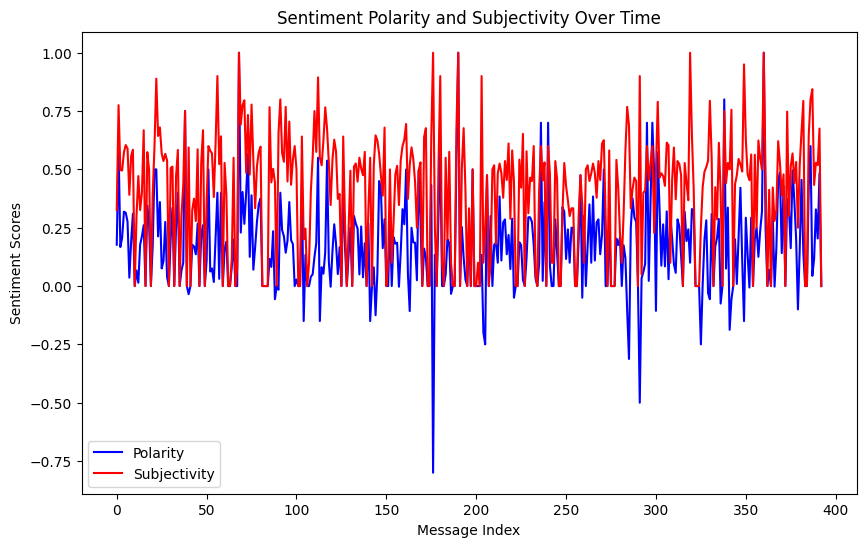

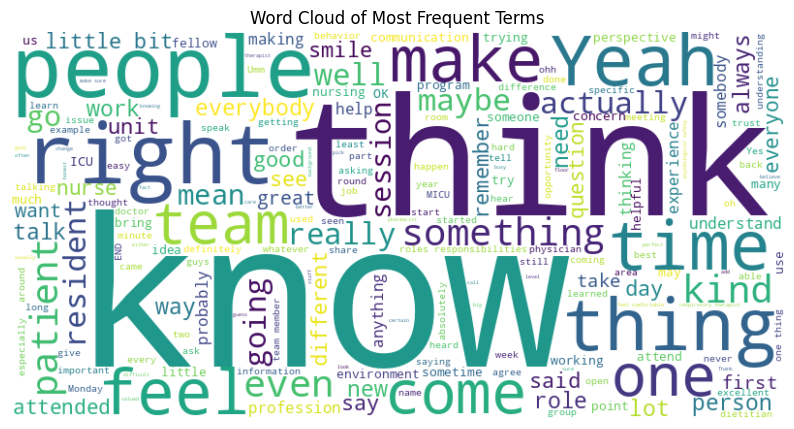

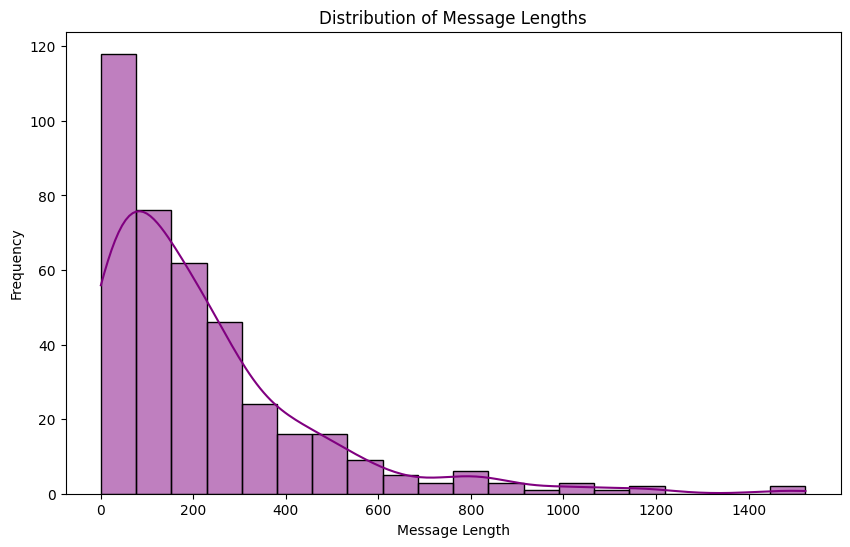

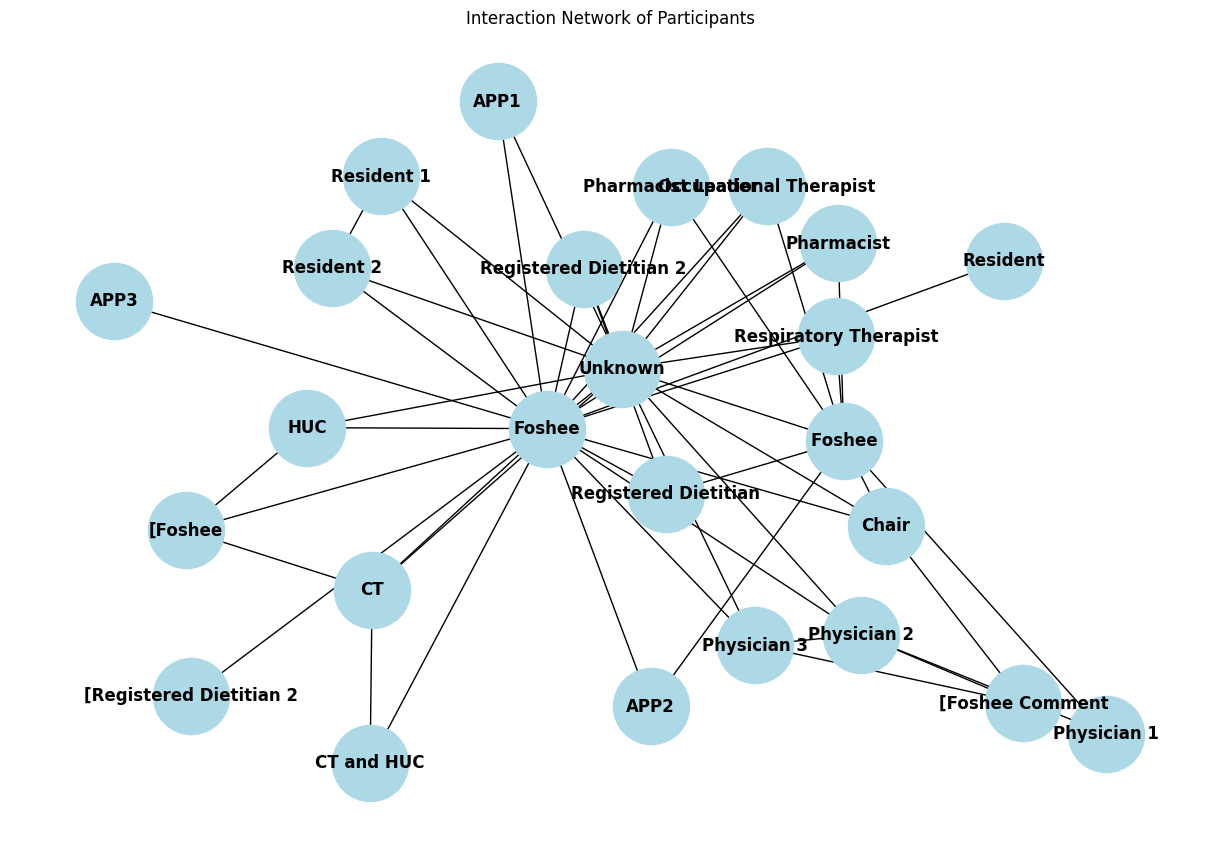

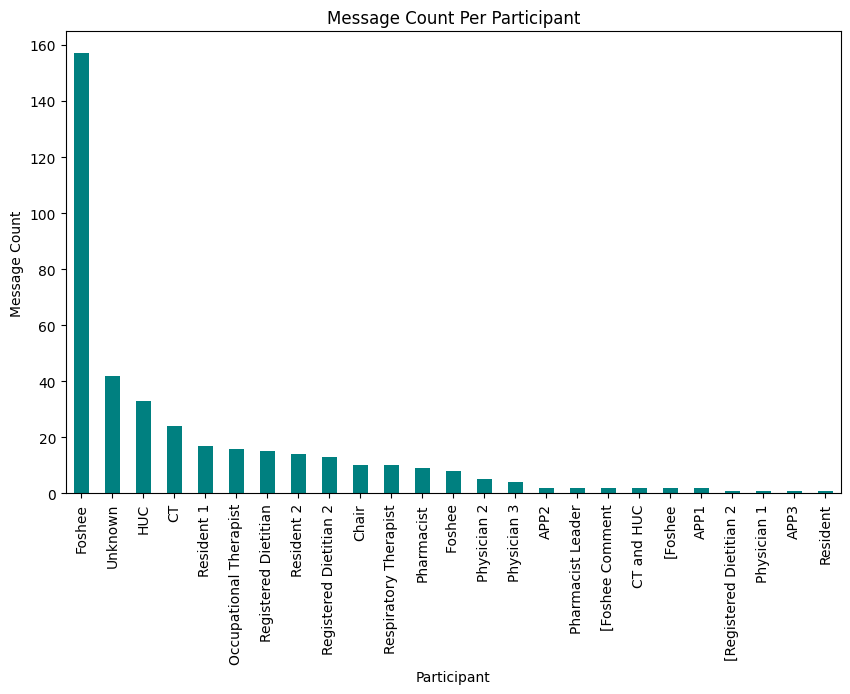

<ipython-input-11-4d936ba95d6a>:118: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Keyword', data=keywords_df.head(10), palette='viridis')


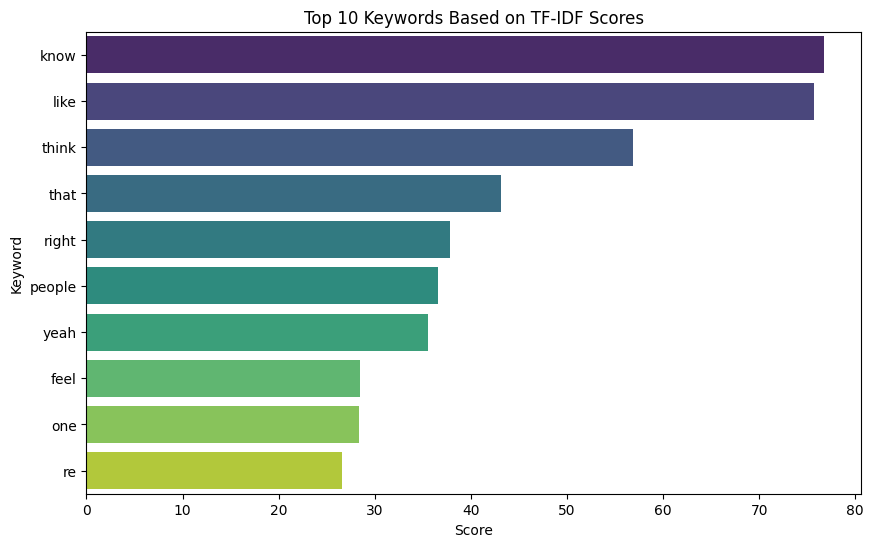

In [ ]:

# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from datetime import datetime
from wordcloud import WordCloud
import networkx as nx
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Ensure NLTK resources are downloaded
nltk.download('stopwords')

# 1. Load and Preprocess Data
# Assuming "merged.txt" contains messages with participant names included
with open('merged.txt', 'r') as file:
    lines = file.readlines()

# Splitting participant names and messages if the format is "Participant: Message"
data = []
for line in lines:
    if ":" in line:
        participant, message = line.split(":", 1)
        data.append((participant.strip(), message.strip()))
    else:
        data.append(("Unknown", line.strip()))

# Convert to DataFrame
data = pd.DataFrame(data, columns=['participant', 'message'])

# Remove stop-words from messages
stop_words = set(stopwords.words('english'))
data['message'] = data['message'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Check the length of messages
print("Number of messages:", len(data))

# Sentiment Analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

data[['polarity', 'subjectivity']] = data['message'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# 2. Plot Sentiment Polarity and Subjectivity Over Time
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['polarity'], label='Polarity', color='blue')
plt.plot(data.index, data['subjectivity'], label='Subjectivity', color='red')
plt.xlabel('Message Index')
plt.ylabel('Sentiment Scores')
plt.title('Sentiment Polarity and Subjectivity Over Time')
plt.legend()
plt.show()

# 3. Word Cloud for Frequent Keywords
text = " ".join(data['message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Terms')
plt.show()

# 4. Message Length Analysis
data['message_length'] = data['message'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data['message_length'], bins=20, kde=True, color='purple')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# 5. Interaction Network of Participants
G = nx.Graph()

# Filter out specific categories or placeholders from participants
data = data[~data['participant'].str.contains(r'\[Comment\]|What would be the areas you would want|What is not good communication|is there a formal process of communication', case=False, na=False)]

# Create edges based on sender and receiver
for i in range(1, len(data)):
    sender = data['participant'].iloc[i - 1]
    receiver = data['participant'].iloc[i]
    if sender != receiver:  # Avoid self-loops
        G.add_edge(sender, receiver)

# Plot the interaction network
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold')
plt.title('Interaction Network of Participants')
plt.show()

# 6. Message Frequency Per Participant
message_count = data['participant'].value_counts()

plt.figure(figsize=(10, 6))
message_count.plot(kind='bar', color='teal')
plt.title('Message Count Per Participant')
plt.xlabel('Participant')
plt.ylabel('Message Count')
plt.show()

# 7. Top Keywords using TF-IDF
vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = vectorizer.fit_transform(data['message'])
tfidf_scores = tfidf_matrix.sum(axis=0).A1
terms = vectorizer.get_feature_names_out()

# Create DataFrame for TF-IDF scores
keywords_df = pd.DataFrame(list(zip(terms, tfidf_scores)), columns=['Keyword', 'Score'])
keywords_df = keywords_df.sort_values(by='Score', ascending=False)

# Plot top 10 keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Keyword', data=keywords_df.head(10), palette='viridis')
plt.title('Top 10 Keywords Based on TF-IDF Scores')
plt.show()